In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [13]:
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [14]:
mapa = { 
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado",
}

dados.rename(columns = mapa, inplace=True)

In [15]:
troca = { 
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

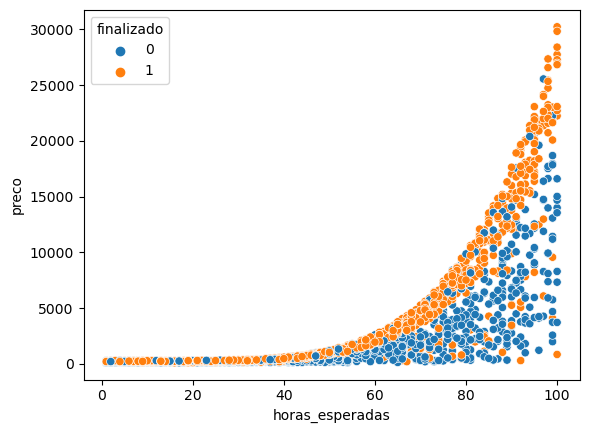

In [16]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

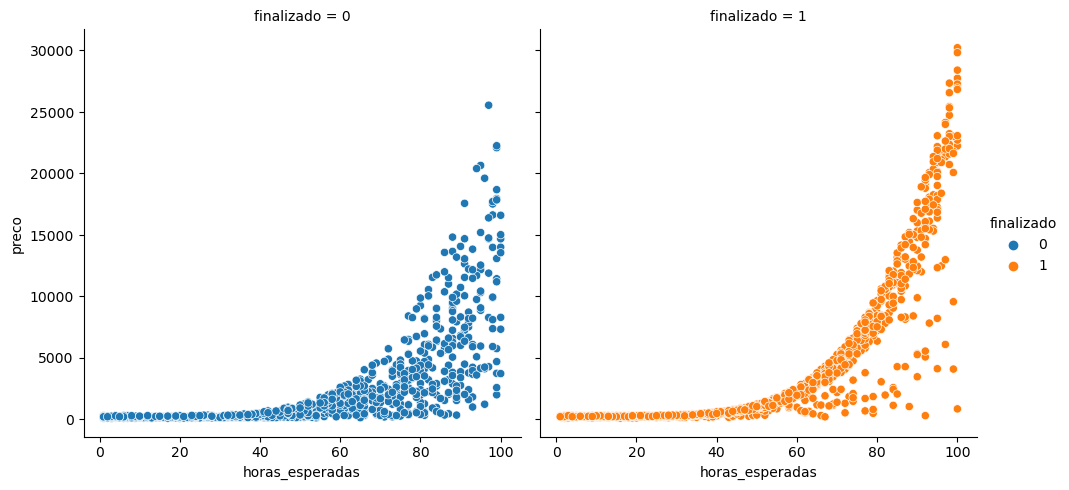

In [17]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=dados)

In [22]:
raw_treino_x = dados[['horas_esperadas', 'preco']]
raw_teste_x = dados['finalizado']

In [26]:
from sklearn.svm import SVC
seed = 5

np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')

Treinaremos com 2157 elementos e testaremos com 540 elementos


In [29]:
model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi de %.2f%%" % acuracia)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi de 66.85%
A acurácia foi 66.85%


In [30]:
previsoes_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_base) * 100
print("A acurácia do algoritmo de baseline %.2f%%" % acuracia)

A acurácia do algoritmo de baseline 52.59%


In [31]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

C:\Users\mayaram4rtins\Anaconda3\lib\site-packages\seaborn\_core.py:882: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `horas_esperadas` for parameter `x`

In [32]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

print(x_min, x_max,y_min,y_max)

-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


In [33]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [34]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[-1.7348768 , -0.59627991],
       [-1.70010998, -0.59627991],
       [-1.66534316, -0.59627991],
       ...,
       [ 1.63750439,  5.34670819],
       [ 1.6722712 ,  5.34670819],
       [ 1.70703802,  5.34670819]])

In [35]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'

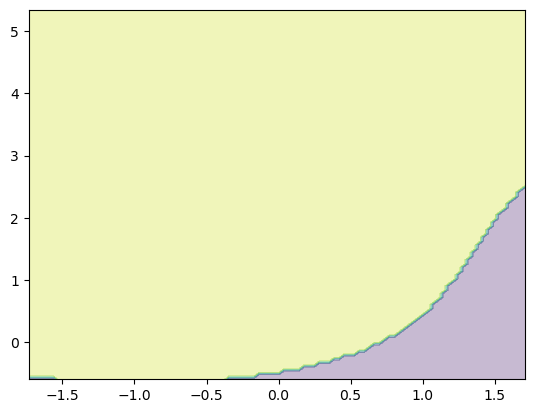

In [36]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)